<a href="https://colab.research.google.com/github/mayank453/Deep-Learning/blob/main/ImageDataGenerator_Dog_breeed_Indetification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall kaggle

Uninstalling kaggle-1.5.6:
  Would remove:
    /usr/local/bin/kaggle
    /usr/local/lib/python3.6/dist-packages/kaggle-1.5.6.dist-info/*
    /usr/local/lib/python3.6/dist-packages/kaggle/*
Proceed (y/n)? y
  Successfully uninstalled kaggle-1.5.6


In [ ]:
!pip install --upgrade kaggle

     |████████████████████████████████| 61kB 3.3MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=ce8cc756669f294ef0c28cc9006302684987483c5f80a311b2e7fbd7889328e3
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle


In [ ]:
!mkdir -p /root/.kaggle

In [ ]:
!mv kaggle.json /root/.kaggle

In [ ]:
import kaggle 

In [ ]:
!kaggle competitions download -c dog-breed-identification

100% 690M/691M [00:10<00:00, 82.4MB/s]
100% 691M/691M [00:10<00:00, 69.4MB/s]


In [ ]:
!unzip -q dog-breed-identification.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil



In [ ]:
labels_dog = pd.read_csv("labels.csv")

In [ ]:
!ls train | tail 

ffc532991d3cd7880d27a449ed1c4770.jpg
ffca1c97cea5fada05b8646998a5b788.jpg
ffcb610e811817766085054616551f9c.jpg
ffcde16e7da0872c357fbc7e2168c05f.jpg
ffcffab7e4beef9a9b8076ef2ca51909.jpg
ffd25009d635cfd16e793503ac5edef0.jpg
ffd3f636f7f379c51ba3648a9ff8254f.jpg
ffe2ca6c940cddfee68fa3cc6c63213f.jpg
ffe5f6d8e2bff356e9482a80a6e29aac.jpg
fff43b07992508bc822f33d8ffd902ae.jpg


In [ ]:
labels_dog.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


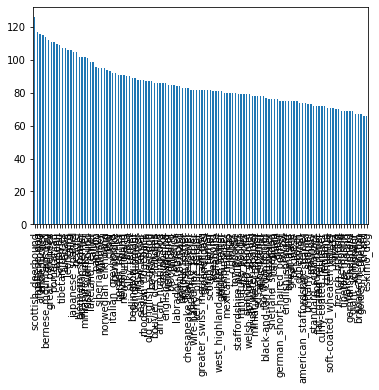

In [ ]:
labels_dog.breed.value_counts().plot.bar()

In [ ]:
labels_dog['id'] = labels_dog['id']+".jpg"

In [ ]:
labels_dog.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation: Changing the properties of images by applying transformation (horizontal flip, altering brightness, vertical flip etc), when the data is less.

In [ ]:
idg = ImageDataGenerator(validation_split=.2, rescale = 1/255.0, horizontal_flip=True, brightness_range= [0.2,0.4] )

train_generator = idg.flow_from_dataframe(labels_dog, directory="train", x_col='id', y_col='breed', target_size=(150,150) , batch_size=32 , subset="training")
val_generator = idg.flow_from_dataframe(labels_dog, directory="train", x_col='id', y_col='breed', target_size=(150,150) , batch_size=32 , subset="validation" )



Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [ ]:
# train -> 8178
# test -> 2044

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
del model

In [ ]:
model = Sequential()

model.add(Conv2D( 64, (3,3) , (1,1) , activation=relu, input_shape=(150,150,3)) )

model.add(MaxPooling2D( (2,2) , (2,2)) )

model.add(Conv2D( 128, (3,3) , (1,1) , activation=relu))

model.add(MaxPooling2D( (2,2) , (2,2)) )

model.add(Flatten())

model.add(Dense(256, activation=relu))

model.add(Dense(120, activation=softmax))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 165888)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               42467584  
_________________________________________________________________
dense_3 (Dense)              (None, 120)              

In [ ]:
ms = ModelCheckpoint(".",monitor = 'val_loss')


In [ ]:
model.compile(optimizer=SGD(), loss=categorical_crossentropy, metrics=['acc'])

model.fit_generator(train_generator, epochs=10, validation_data=val_generator, callbacks=[ms])


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
256/256 [==============================] - ETA: 0s - loss: 4.7855 - acc: 0.0104WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./assets
256/256 [==============================] - 57s 221ms/step - loss: 4.7855 - acc: 0.0104 - val_loss: 4.7794 - val_acc: 0.0132
Epoch 2/10
256/256 [==============================] - 57s 223ms/step - loss: 4.7724 - acc: 0.0150 - val_loss: 4.7707 - val_acc: 0.0176
Epoch 3/10
256/256 [==============================] - 58s 2

How Data Augmentation Works?

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [ ]:
testimage = load_img("train/000bec180eb18c7604dcecc8fe0dba07.jpg")

testimage = img_to_array(testimage)

testimage = testimage.reshape((1,)+testimage.shape)



In [ ]:
idg2 = ImageDataGenerator(rotation_range=30, horizontal_flip=True, zoom_range = 0.3, height_shift_range = 0.3, brightness_range=[0.4,0.6]) 

In [ ]:
i = 0

In [ ]:
for batch in idg2.flow(testimage, batch_size=1,save_to_dir='sample_data', save_prefix='dog', save_format='jpeg'):
  i += 1
  if i > 20:
    break  # otherwise the generator would loop indefinitely


In [ ]:
from PIL import Image

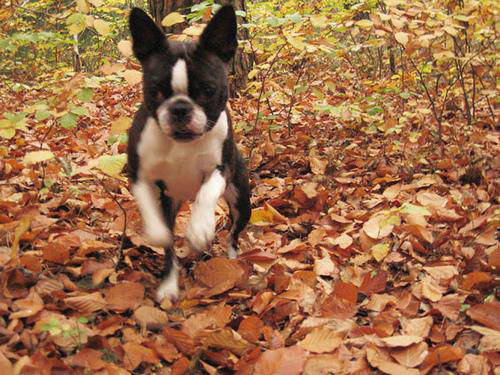

In [ ]:
Image.open("train/000bec180eb18c7604dcecc8fe0dba07.jpg")

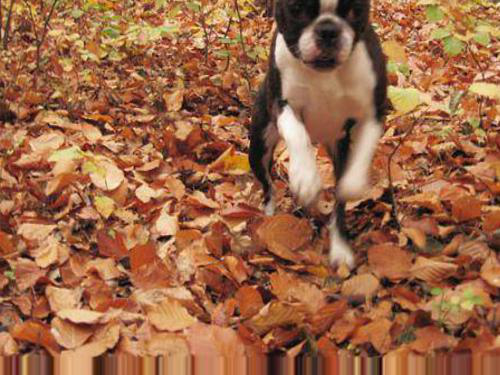

In [ ]:
Image.open("sample_data/dog_0_1490.jpeg")

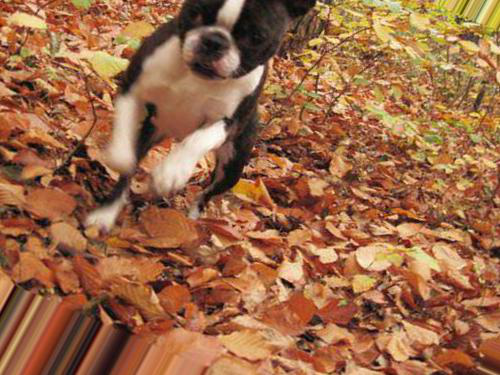

In [ ]:
Image.open("sample_data/dog_0_2047.jpeg")

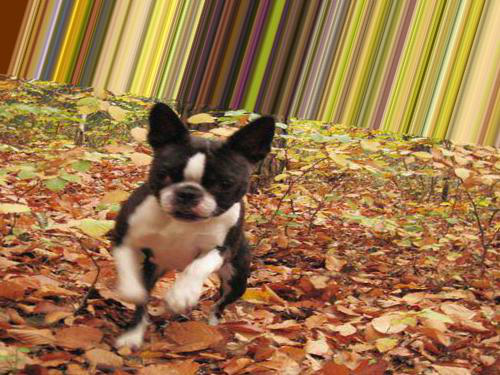

In [ ]:
Image.open("sample_data/dog_0_9092.jpeg")